# Project Air Quality
You will be asked to implement several functions. Team work is not allowed. Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 

### Dataset: Air quality
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer [1].

**Attributes of the dataset are:**

|Sl No|Attribute|Description|
|-|-|-|
|0|Date|Date (DD/MM/YYYY) |
|1|Time|Time (HH.MM.SS) |
|2|CO(GT)|True hourly averaged concentration CO in mg/m^3 (reference analyzer) |
|3|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|4|NMHC(GT)|True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|5|C6H6(GT)|True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) |
|6|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) |
|7|NOx(GT)|True hourly averaged NOx concentration in ppb (reference analyzer) |
|8|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
|9|NO2(GT)|True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) |
|10|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
|11|PT08.S5(O3)|PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) |
|12|T|Temperature in Â°C |
|13|RH|Relative Humidity (%) |
|14|AH|AH Absolute Humidity|


### Problem:
Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. 
The humidity of the air, if it is not maintained at optimal levels, can be a factor that has adverse affects on people's health. According to reports, the human body is said to be most comfortable when the relative humidity of the area ranges between 20 and 60%.


### Objective:
So we will **predict the Relative Humidity** of a given point of time based on the all other attributes affecting the change in RH.


### References:
[1] S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005


### <u>Content:<u>

[1) Load data ](#load_data)
    
[2) Basic statistics](#stat)

[3) Data Cleaning](#hr)
    
[4) Co-relation between variables](#corr)

[5) Influence of features on output-RH](#lin)

[6) Baseline Linear Regression](#LR)

[7) Feature Engineering and testing model](#FE)

[8) Decision Tree Regression ](#DT)
    
[9) Random Forest Regression](#RF) 
    
[9.1) Blox plot](#bxplot)

[11) Conclusion](#conc)


In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

#### 1) Load data<a name="load_data"></a>
We will load the data and have a basic first look at the data.

- Use `pandas.read_csv('path/to/dataset.csv',header=None,skiprows=1,names=col,na_filter=True, na_values=-200,usecols=use)` to load the data. 

In [ ]:
# Defining header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

# Defining number of columns from csv
use = list(np.arange(len(col)))

# Reading the data from csv
df_air = pd.read_csv(
    'data/AirQualityUCI.csv',  # Write the path of the Air Quality Dataset
    header=None, skiprows=1, names=col, na_filter=True, na_values=-200, usecols=use
)

- Visualize the first and the last 7 rows of the data.

In [ ]:
df_air.head(7)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603


In [ ]:
df_air.tail(7)

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Print the dtypes in the dataframe

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         7674 non-null   float64
 3   PT08_S1_CO    8991 non-null   float64
 4   NMHC_GT       914 non-null    float64
 5   C6H6_GT       8991 non-null   float64
 6   PT08_S2_NMHC  8991 non-null   float64
 7   NOX_GT        7718 non-null   float64
 8   PT08_S3_NOX   8991 non-null   float64
 9   NO2_GT        7715 non-null   float64
 10  PT08_S4_NO2   8991 non-null   float64
 11  PT08_S5_O3    8991 non-null   float64
 12  T             8991 non-null   float64
 13  RH            8991 non-null   float64
 14  AH            8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


- Print dataframe shape

In [ ]:
df_air.shape

(9471, 15)

#### 2) Basic statistics<a name="stat"></a>
Here we look at basic statistics. This is always helpful to get a feel for your data and might help to find some problems in your data.
- Print dataframe statistics (mean, max & min values for each column etc.)

In [ ]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


#### 3) Data Cleaning<a name="hr"></a>
Here we clean up some missing values.

- Drop **ONLY** rows containing **ALL** NaN (not a number) values 
- NOTE: You can use `inplace=True` (See: https://www.geeksforgeeks.org/what-does-inplace-mean-in-pandas/)

In [ ]:
df_air.dropna(how='all', axis=0, inplace=True)

- Now, drop **ONLY** rows with the `thresh=10` NaN values

In [ ]:
df_air.dropna(thresh=10, axis=0, inplace=True)

- How many missing values are in the dataset? Print the number.

In [ ]:
print('Count of missing values:\n')
# Count the invalid values
df_air.isna().sum().sum()

Count of missing values:



np.int64(12944)

##### Fill missing value strategy
1. CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour
2. NHHC_GT will be dropped as it has 90% missing data

In [ ]:
df_air['DATE'] = pd.to_datetime(df_air.DATE, format='%m/%d/%Y')   #Format date column (See: https://docs.python.org/3/library/datetime.html)

In [ ]:
# Creating "MONTH" column
df_air['MONTH']=df_air.index.month     
df_air.reset_index(inplace=True) # Run this line only once!

In [ ]:
# Splitting hour from time into new column (See: https://docs.python.org/3/library/stdtypes.html#string-methods)
df_air['HOUR'] = df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

- set DATE as the index 

In [ ]:
df_air.set_index('DATE', inplace=True)

- Drop column NMHC_GT; it has 90% missing data

In [ ]:
df_air.drop(columns='NMHC_GT', inplace=True)

- Fill NaN values with monthly average of particular hour  (See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) HINT: use `.groupby(['MONTH','HOUR'])`

In [ ]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

- Print missing values per attribute

In [ ]:
print('Left out missing value:')
# Count them
df_air.shape[0] - df_air.count()

Left out missing value:


DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64

 - Fill NaN values with hourly average value HINT: use `.groupby(['HOUR'])`

In [ ]:
# Filling left out NaN values with hourly average value
df_air['CO_GT'] = df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT'] = df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT'] = df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

#### 4) Understand correlation between variables<a name="corr"></a>

 - Display a heatmap using `sns.heatmap` to see correlation between variables

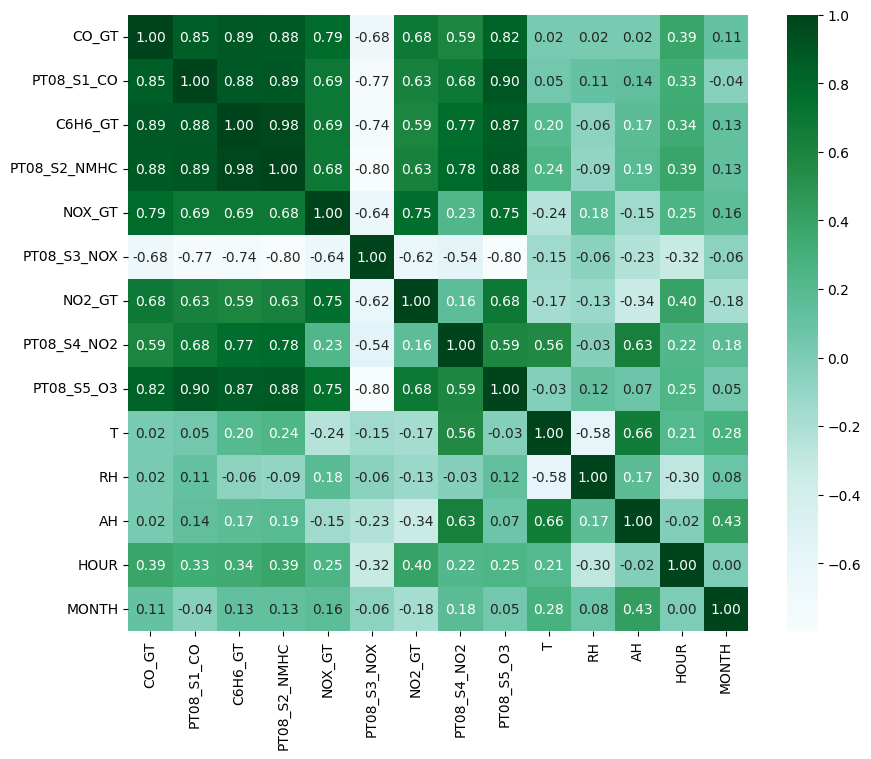

In [ ]:
sns.heatmap(df_air.select_dtypes(include="number").corr(), annot=True, cmap='BuGn', fmt=".2f")
plt.show()

 - Describe the heatmap using your own words

In [ ]:
# ANSWER: ...

#### 5) Try to understand degree of linearity between RH output and other input features<a name="lin"></a>

 - plot all features (x-axis) against output variable RH (y-axis) using `sns.lmplot`. 
 - describe the results

In [ ]:
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,HOUR,MONTH
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3


/var/folders/hw/y61sswm55ss5_mz_3jfglnh03lrr77/T/ipykernel_18712/1844351810.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_air = df_air.apply(pd.to_numeric, errors='ignore')


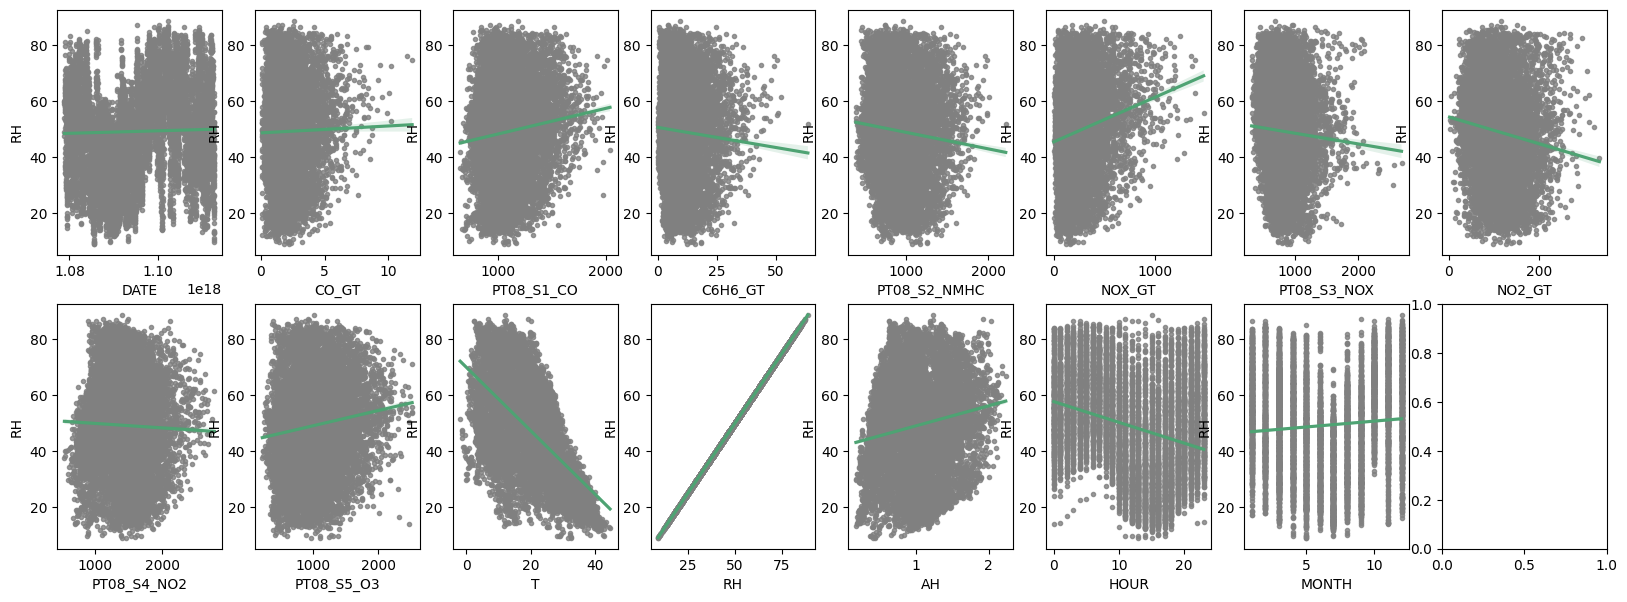

In [ ]:
# Ensure numeric columns are properly converted
df_air = df_air.apply(pd.to_numeric, errors='ignore')

# Exclude non-numeric columns from plotting
numeric_columns = df_air.select_dtypes(include="number").columns


# Plot all numeric features against output variable RH
fig, axes = plt.subplots(2, 8, figsize=(20, 7))
for i, feature in enumerate(numeric_columns):
    sns.regplot(data=df_air, x=feature, y='RH', ax=axes[i // 8, i % 8], line_kws=dict(color="#4ea373"), color="gray", marker='.')



In [ ]:
#ANSWER: ...

### 6) Linear Regression<a name="LR"></a>

In [ ]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

- Define Feature (as X) and Target (as y)

In [ ]:
df_air.keys()

Index(['DATE', 'TIME', 'CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC',
       'NOX_GT', 'PT08_S3_NOX', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T',
       'RH', 'AH', 'HOUR', 'MONTH'],
      dtype='object')

In [ ]:
X = df_air.drop(columns=['DATE', 'TIME', 'RH'])  # X-input features
y = df_air['RH']  # y-input features

- Plot distribution of target variable.

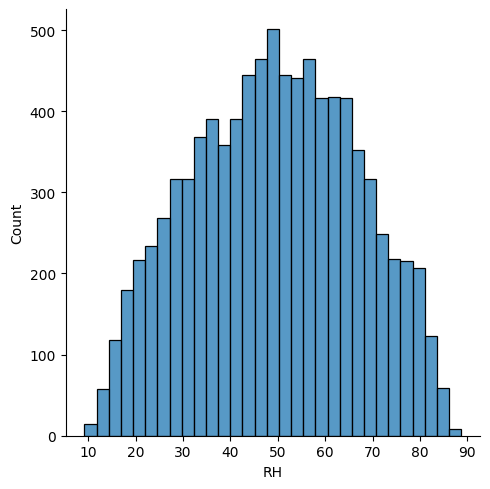

In [ ]:
sns.displot(data=df_air, x=y)
plt.show()

##### Train test split:
 - split the data into train (70%) and test(30%), use a fixed random seed
 - print the size of the train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Training data size:')
print(X_train.shape)

print('Test data size:')
print(X_test.shape)

Training data size:
(6293, 13)
Test data size:
(2698, 13)


- Normalize data using `StandardScaler`
    - Be careful about which data you use to fit the normalization.
    - apply the same normalisation to the test data as to the train data
    - DO NOT forget to use the normalization for each model (SVR etc.)

In [ ]:
normalizer = StandardScaler()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

 - Train the Linear Regression model (See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Print intercept and slopes

In [ ]:
print('Intercept: \t\t\t\t{}'.format(model_lr.intercept_))
for slope, key in zip(model_lr.coef_, X.keys()):
    print('Slope of {:20}: \t\t{}'.format(key, slope))

Intercept: 				49.17484506594628
Slope of CO_GT               : 		-1.7063088156145774
Slope of PT08_S1_CO          : 		3.387476727425775
Slope of C6H6_GT             : 		-5.611516015172194
Slope of PT08_S2_NMHC        : 		-1.183740149950377
Slope of NOX_GT              : 		3.4844695749256718
Slope of PT08_S3_NOX         : 		-0.7025176815964639
Slope of NO2_GT              : 		-1.1038178289858553
Slope of PT08_S4_NO2         : 		6.81061769707612
Slope of PT08_S5_O3          : 		-1.2795140912227048
Slope of T                   : 		-20.244001871194886
Slope of AH                  : 		12.105900336159085
Slope of HOUR                : 		-0.6181582438414384
Slope of MONTH               : 		1.3372332908907896


- Predict on the test data
- Compute and print performance metrics as RMSE. This will be our baseline!

In [ ]:
print('Baseline RMSE:')
y_pred = model_lr.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
baseline_rmse

Baseline RMSE:


np.float64(6.012894371219269)

#### <u>6a) Conclusion of baseline linear regression model:<a name="LRcon"></a>

In [ ]:
# write your conclusion here

### 7) Feature engineering and testing model:<a name="FE"></a>

We will try the model with multiple feature combination and see if RMSE is improving

- Write function to measure RMSE with different combinations of features (try at least 3 combinations of your choice)

In [ ]:
def train_test_RMSE(df_air, feat_):    
    """
    The function train_test_RMSE returns the RMSE for different combinations 
    of features feat_ of the dataframe df_air.
    
        :param df_air: (pandas.DataFrame) Our dataset
        :param feat_: (List[str]) A list of column names
        :return: (float) The score value
    """
    X = df_air[feat_]
    y = df_air['RH']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    normalizer = StandardScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# Trail 1
train_test_RMSE(df_air, X.keys()[3:9])

np.float64(13.379990751650647)

In [ ]:
# Trail 2
train_test_RMSE(df_air, X.keys()[5:11])

np.float64(6.380044122842425)

In [ ]:
# Trail 3
train_test_RMSE(df_air, X.keys()[3:])

np.float64(6.155679586361357)

#### <u>7a) Conclusion of Feature Engineering and testing:<a name="FEcon"></a>

In [ ]:
# write your conclusion here

### 8) Decision Tree Regression<a name="DT"></a>

Let us try to apply Decision tree regression technique and see if any improvement happens

In [ ]:
from sklearn.tree import DecisionTreeRegressor         # Decision tree regression model


- Fit the DT model and predict:

In [ ]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

- calculate the RMSE of RH prediction

In [ ]:
# Calculate RMSE
print('RMSE of Decision Tree Regression:')
np.sqrt(mean_squared_error(y_pred, y_test))

RMSE of Decision Tree Regression:


np.float64(1.3785070511755988)

#### <u>Conclusion:<u>(Decision Tree Regression)

In [ ]:
# write your conclusion here

### 9) Random Forest Regression<a name="RF"></a>

Let's apply Random Forest regression and measure RMSE

In [ ]:
from sklearn.ensemble import RandomForestRegressor           # Import random forest regressor
from sklearn.model_selection import GridSearchCV       # Import grid search cv

- Fit the RF model and predict

In [ ]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

- RMSE of RH prediction

In [ ]:
# Calculate RMSE
print('RMSE of predicted RH in RF model:')
np.sqrt(mean_squared_error(y_pred, y_test))

RMSE of predicted RH in RF model:


np.float64(0.7136440578915894)

- Try to improve on baseline RF model: use `GridSearchCV` to search between different hyperparameters and plot the resulting RMSE
    - use different numbers of estimators
    - use cv of 5 or 10
    - use the correct scoring function
    - then, use the best model hyperparameters to predict on the test data

In [ ]:
grid_searcher = GridSearchCV(model_rf, {'n_estimators': [10, 15, 100]}, cv=5, scoring='neg_mean_squared_error')

In [ ]:
model_rf2 = grid_searcher.fit(X_train, y_train)

In [ ]:
y_pred = model_rf2.best_estimator_.predict(X_test)

In [ ]:
print('RMSE using RF grid search method')  
np.sqrt(mean_squared_error(y_pred, y_test))

RMSE using RF grid search method


np.float64(0.7056369644331995)

- Write here your conclusions regarding the Grid Search method. Did the performance improve? How much?

In [ ]:
# your answer here

### 9.1) Plot box plots of the error <a name="bxplot"></a>
- Plot the box plots of absolute errors at different pridiction range (prediction: <20; 20-40; >40)

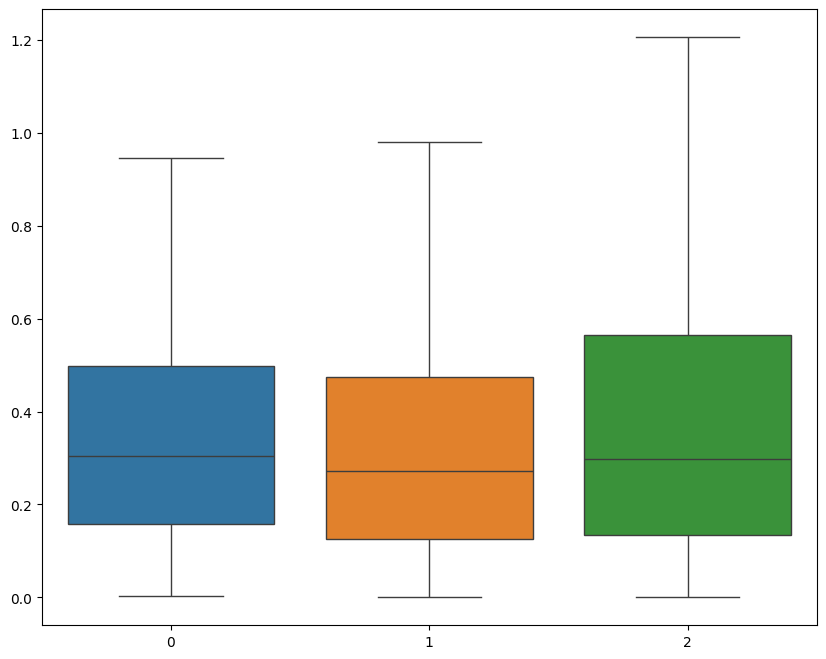

In [ ]:
error = abs(y_test - y_pred)
df_errors = pd.DataFrame(data={'error': error, 'target': y_test, 'prediction': y_pred})
data = [
    df_errors[df_errors['prediction'] < 20]['error'].to_numpy(),
    df_errors[(df_errors['prediction'] >= 20) & (df_errors['prediction'] < 40)]['error'].to_numpy(),
    df_errors[df_errors['prediction'] >= 40]['error'].to_numpy(),
]
sns.boxplot(data=data, showfliers=False)
plt.show()

#### <u>Conclusion: Random Forest

In [ ]:
# write conclusion here

### Conclusion<a name="conc"></a>

 - Summarize here your conclusions regarding the models used 
